# **2. Interactive Debugging Tool**

 **Section 2's code implements an ipywidget (or interactive tool of your choosing) that allows you to flip through all of the events, for every game of a given season, with the ability to switch between the regular season and playoffs.**

In [2]:
# Importing necessary libraries for Interactive Debugging
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import ipywidgets as widgets
from ipywidgets import Dropdown
from IPython.display import clear_output, display

In [4]:
# Creating rink image path and rink image
df=pd.read_csv('nhl_all_games_data.csv')
rink_img_path = "rink.png"
rink_img = mpimg.imread(rink_img_path)

In [5]:
# Defining x, y, and etype columns
xcol, ycol = "details_xCoord", "details_yCoord"
etype_col = "typeDescKey" if "typeDescKey" in df.columns else ("typeDesc" if "typeDesc" in df.columns else "type")

# Function which defines drawing playing events
def draw_play_event(season, gameDate, event_id):
    clear_output(wait=True)

    # Defining the given nhl game
    df_game = df[(df['season'] == season) & (df['gameDate'] == gameDate)]
    # IF game is empty then no events for this game
    if df_game.empty:
        print("No events for this game")
        return
    # If event id is not in the game, then no event for game
    if event_id not in df_game['eventId'].unique():
        print(f"Event ID {event_id} not found in this game")
        return
    # Defining events
    df_event = df_game[df_game['eventId'] == event_id]
    # Defining coordinates
    df_coords = df_event.dropna(subset=[xcol, ycol])
    # Defining figures and axis
    fig, ax = plt.subplots(figsize=(10,6))
    ax.imshow(rink_img, extent=[-100,100,-42.5,42.5], zorder=0, aspect='auto')
    # IF coordinates are not empty then plot them with ax.scatter
    if not df_coords.empty:
      # Plotting with ax.scatter
        ax.scatter(df_coords[xcol], df_coords[ycol], c="blue", s=60, alpha=0.8, zorder=5)
        for _, row in df_coords.iterrows():
            label = f"{row.get(etype_col,'')} ({row.get('timeInPeriod','')})"
            ax.text(row[xcol]+2, row[ycol]+2, label, fontsize=8, color="black")
    # Setting axis limits and titles
    ax.set_xlim(-100,100)
    ax.set_ylim(-42.5,42.5)
    ax.set_aspect("equal")
    ax.set_title(f"{season} | {gameDate} | Event {event_id}", fontsize=14)
    plt.show()

    display(df_event.reset_index(drop=True))

# Defining widgets for season, game, and event slider
season_dd = widgets.Dropdown(options=sorted(df['season'].unique()), description="Season")
game_dd   = widgets.Dropdown(description="Game Date")
event_slider = widgets.SelectionSlider(description="Event ID", options=[0], value=0,
                                       continuous_update=False, layout=widgets.Layout(width="80%"))
# Function which allows you to update games
def update_games(*args):
    season_val = season_dd.value
    games = sorted(df[df['season']==season_val]['gameDate'].unique())
    game_dd.options = games
    if games:
        game_dd.value = games[0]
season_dd.observe(update_games, names="value")
# Function which updates events
def update_events(*args):
    season_val = season_dd.value
    game_val = game_dd.value
    df_game = df[(df['season']==season_val) & (df['gameDate']==game_val)]
    event_ids = sorted(df_game['eventId'].unique())
    if len(event_ids) > 0:
        event_slider.options = event_ids
        event_slider.value = event_ids[0]
    else:
        event_slider.options = [0]
        event_slider.value = 0
game_dd.observe(update_events, names="value")

out = widgets.interactive_output(
    draw_play_event,
    {"season": season_dd, "gameDate": game_dd, "event_id": event_slider}
)

# Calling updates games and update events function
update_games()
update_events()


ui = widgets.VBox([season_dd, game_dd, event_slider, out])
# Displaying ui
display(ui)

# **2. Interactive Debugging Tool (Blog Post)**

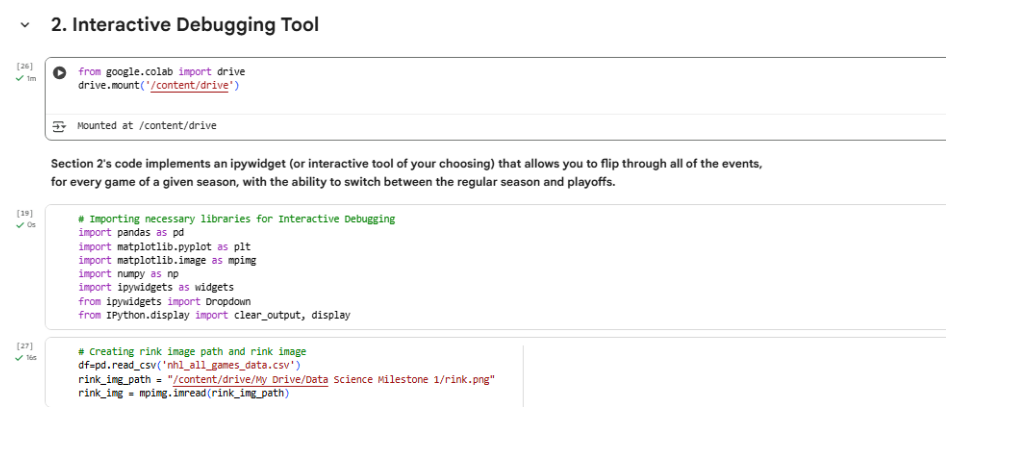
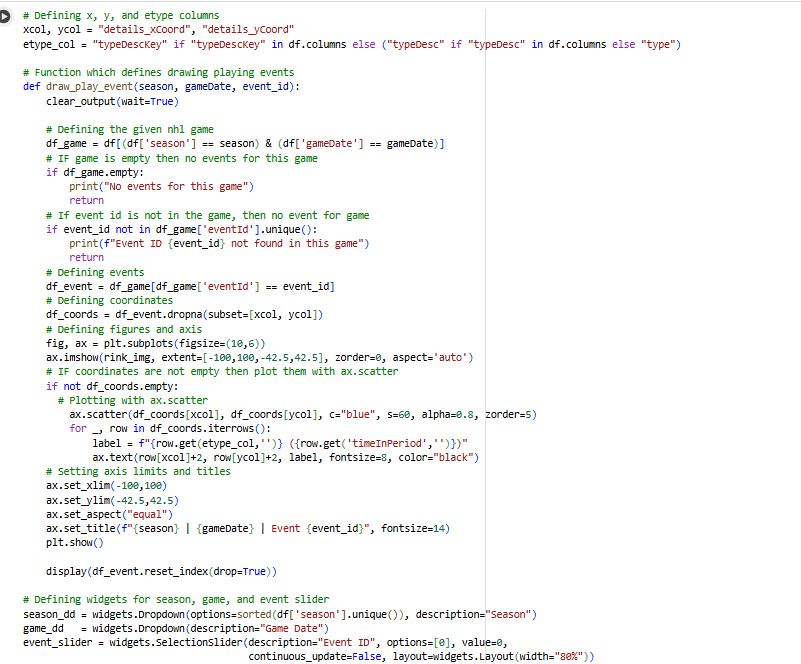
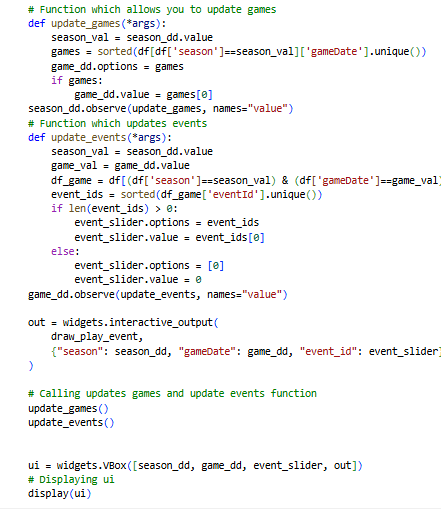
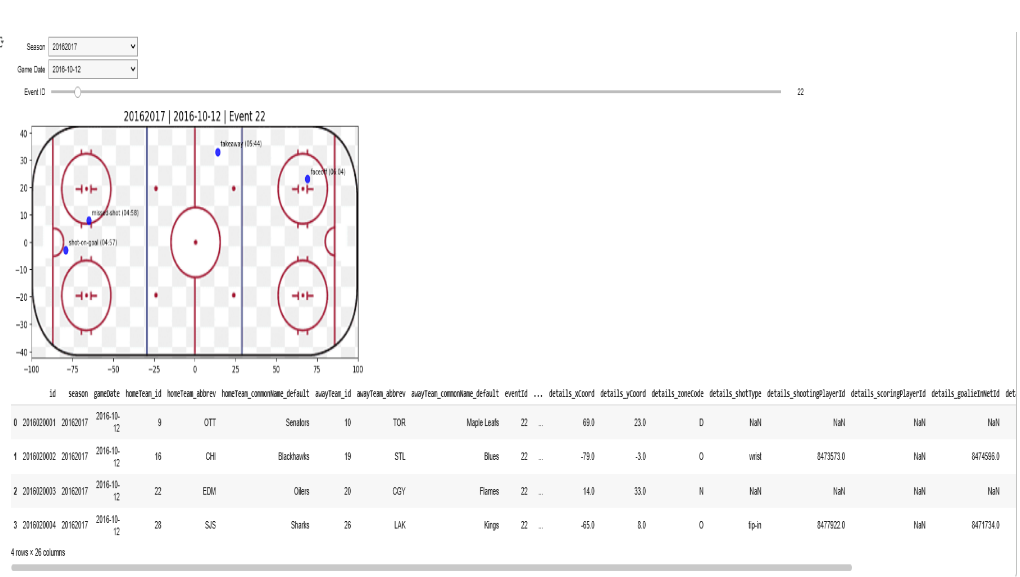
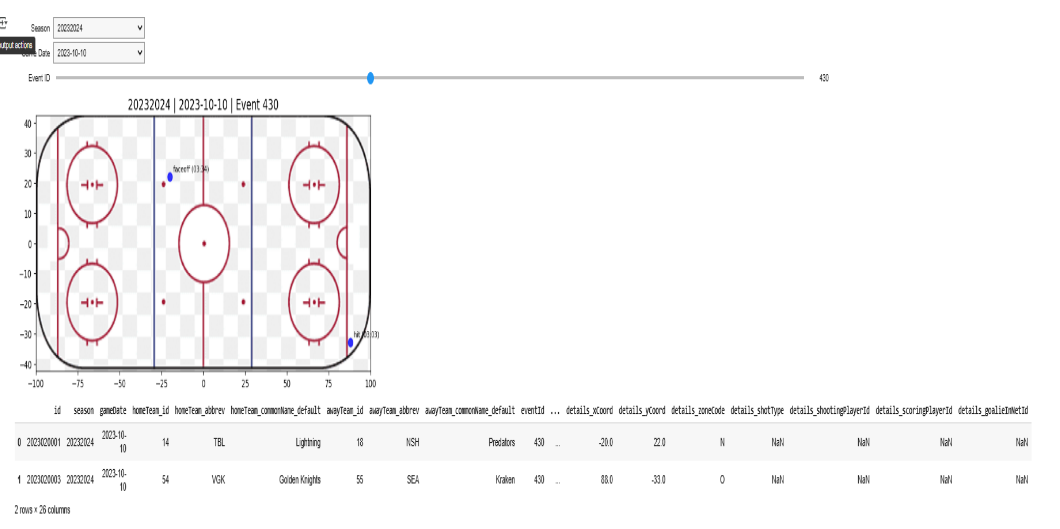
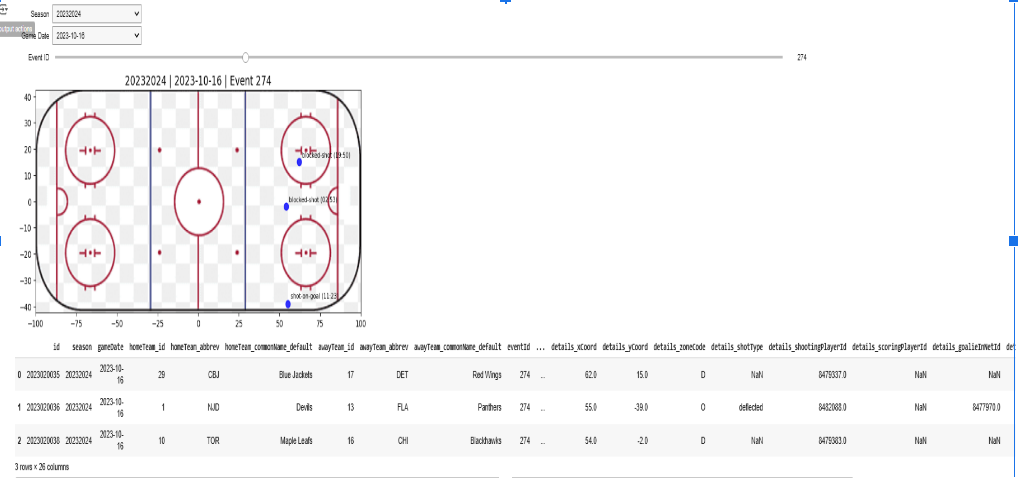

This interactive debugging tool uses ipywidgets to explore NHL play-by-play data by season, game, and event ID.  The tool then plots the event coordinates directly on a rink image. This will allow us to quickly visualize specific plays, along with metadata such as event type and timing, making it much easier to verify and debug the dataset where anomalous or irregular data occurs.
